<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

제6장 서포트벡터머신

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
iris = load_iris()
x = iris.data
y = iris.target
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(trainx)
xtestscaled = scaler.transform(testx)

model = SVC(kernel='linear', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
accuracy = accuracy_score(testy, ypred)
print(accuracy)

0.9777777777777777


In [3]:
print(confusion_matrix(testy, ypred))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [4]:
print(classification_report(testy, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [5]:
resultsvm = pd.DataFrame(np.zeros((45,2)), columns=[['Actual', 'Prediction']])
resultsvm['Actual'] = testy # 실제
resultsvm['Prediction'] = ypred # 예측
resultsvm.head()

,Actual,Prediction
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [6]:
from google.colab import drive
drive.mount('/content/drive')
resultsvm.to_csv('/content/drive/MyDrive/Colab Notebooks/work/resultsvm.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
iris = load_iris()
x = iris.data
y = iris.target
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(trainx)
xtestscaled = scaler.transform(testx)

model = SVC()
param_grid = {
    'kernel': ['poly', 'linear', 'sigmoid',],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001]
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrainscaled, trainy)
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}


In [8]:
bestmodel = grid_search.best_estimator_
accuracy = accuracy_score(testy, ypred)
print(accuracy)

0.9777777777777777


제7장 베이지안 기법

In [9]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/data.csv', encoding='euc-kr', index_col=0)
df = data.dropna()
df['gender'] = df['성별'].map({'남자': 1, '여자': 0})
df['house'] = df['주거지역'].map({'소도시': 0, '중도시': 1, '대도시': 2})
df['like'] = df['쿠폰선호도'].map({'예':1, '아니오':0})
print(df.head())

        성별     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용회수 쿠폰선호도  \
고객번호                                                                         
190105  남자  45-49세  회사원  소도시  195.6      4  76.8  64.8  54.0       3     예   
190106  남자  25-29세  공무원  소도시  116.4      7  44.4  32.4  39.6       6   아니오   
190107  남자  50세 이상  자영업  중도시  183.6      4  66.0  66.0  51.6       5     예   
190108  남자  50세 이상  농어업  소도시  168.0      4  62.4  52.8  52.8       4   아니오   
190109  남자  40-44세  공무원  중도시  169.2      4  63.6  54.0  51.6       5   아니오   

        품질  가격  서비스  배송  쇼핑만족도    소득  gender  house  like  
고객번호                                                       
190105   7   7    1   4      4  4300       1      0     1  
190106   7   4    7   7      7  7500       1      0     0  
190107   4   4    3   3      6  2900       1      1     1  
190108   3   3    4   6      5  5300       1      0     0  
190109   6   4    7   4      6  4000       1      1     0  


In [10]:
x = df[['gender', 'house']]
y = df['like']
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = CategoricalNB(alpha=0.8).fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])

[1 0 1 1 1 1 1 1 0 0]


In [11]:
print(model.get_params())

{'alpha': 0.8, 'class_prior': None, 'fit_prior': True, 'force_alpha': True, 'min_categories': None}


In [12]:
print(model.score(testx, testy))

0.7777777777777778


In [13]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/data.csv', encoding='euc-kr', index_col=0)
df = data.dropna()
df['gender'] = df['성별'].map({'남자':1, '여자':0})
df['house'] = df['주거지역'].map({'소도시':0, '중도시':1, '대도시':2})
df['like'] = df['쿠폰선호도'].map({'예':1, '아니오':0})
x = df[['gender', 'house']]
y = df['like']
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = CategoricalNB(alpha=0.8).fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])

[1 0 1 1 1 1 1 1 0 0]


In [14]:
print(model.get_params())

{'alpha': 0.8, 'class_prior': None, 'fit_prior': True, 'force_alpha': True, 'min_categories': None}


In [15]:
print(model.score(testx, testy))

0.7777777777777778


In [16]:
conf = confusion_matrix(testy, predictions)
print(conf)

[[11  5]
 [ 1 10]]


In [17]:
print(classification_report(testy, predictions))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.67      0.91      0.77        11

    accuracy                           0.78        27
   macro avg       0.79      0.80      0.78        27
weighted avg       0.81      0.78      0.78        27



In [18]:
print(f1_score(testy, predictions))

0.7692307692307693


In [19]:
print(accuracy_score(testy, predictions))
print(precision_score(testy, predictions))
print(recall_score(testy, predictions))

0.7777777777777778
0.6666666666666666
0.9090909090909091


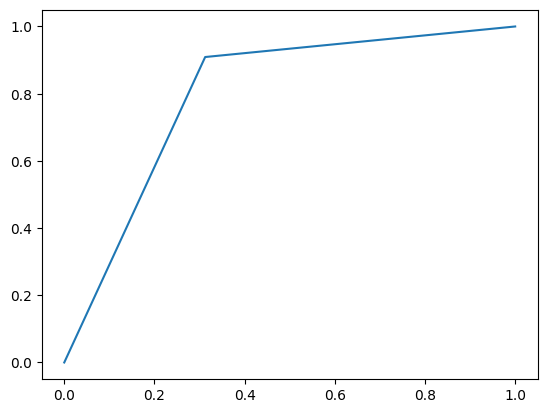

0.7982954545454546


In [22]:
fpr, tpr, thresholds = roc_curve(testy, predictions)
plt.plot(fpr, tpr);plt.show()
print(auc(fpr, tpr))

In [23]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data
y = iris.target
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = GaussianNB().fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])

[1 0 2 1 1 0 1 2 1 1]


In [24]:
print(model.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [25]:
print(model.score(testx, predictions))

1.0


제8장 앙상블 분석